In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
patan = pd.read_excel(r'/content/Patan.xlsx')
sid=pd.read_excel(r'/content/Sid.xlsx')

In [ ]:
patan.sort_values(by=['Date'],inplace=True)
sid.sort_values(by=['Date'],inplace=True)

<Axes: >

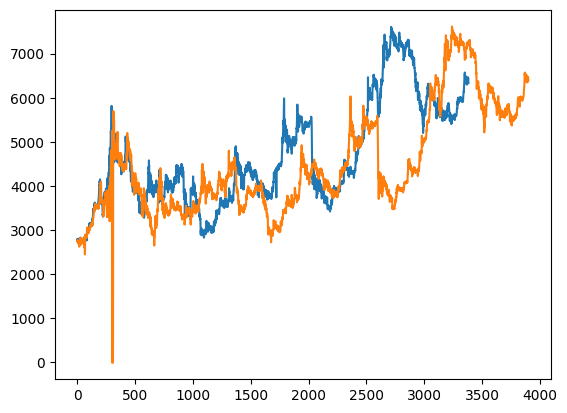

In [ ]:
sid['Price'].plot(kind='line')
patan['Price'].plot(kind='line')
#arima sarima arimax sarimax arch garch var varx lstm ml hybrid

In [ ]:
import pandas as pd

# Load the data from the Excel files
patan_df = pd.read_excel(r'/content/Patan.xlsx')
siddhpur_df=pd.read_excel(r'/content/Sid.xlsx')  # Replace with your actual file path

# Ensure that the 'date' column is in datetime format for comparison
patan_df['Date'] = pd.to_datetime(patan_df['Date'])
siddhpur_df['Date'] = pd.to_datetime(siddhpur_df['Date'])

# Check which dates in siddhpur are not in patan
missing_dates = siddhpur_df[~siddhpur_df['Date'].isin(patan_df['Date'])]

# Append the missing rows (dates and prices)
if not missing_dates.empty:
    updated_patan_df = pd.concat([patan_df, missing_dates[['Date', 'Arrival','Price']]], ignore_index=True)
else:
    updated_patan_df = patan_df  # No new rows to add

# Save the updated DataFrame to a new Excel file
updated_patan_df.to_excel('updated_patan1.xlsx', index=False)  # Replace with your desired file path


In [ ]:
missing_dates.sort_values(by=['Date'],inplace=True)

<ipython-input-6-1559889dabfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_dates.sort_values(by=['Date'],inplace=True)


In [ ]:
missing_dates

,Date,Arrival,Price
56,2010-03-16,192.90,2785.0
152,2010-07-24,4.20,3530.0
179,2010-08-26,31.30,3560.0
180,2010-08-27,40.00,3655.0
181,2010-08-28,32.50,3660.0
...,...,...,...
3341,2024-09-17,42.38,6122.0
3360,2024-10-11,34.13,6397.0
3373,2024-11-06,38.25,6415.0
3374,2024-11-07,29.63,6400.0


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Define the path to your Excel file
excel_path = r'/content/updated_patan1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_path)

In [ ]:
# Ensure the 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
df.sort_values(by='Date', inplace=True)

# Generate a list of consecutive dates
start_date = df['Date'].min()
end_date = df['Date'].max()

In [ ]:
date_range = pd.date_range(start_date, end_date, freq='D')

In [ ]:
# Find missing dates
missing_dates = date_range[~date_range.isin(df['Date'])]

# Create a DataFrame for missing dates with NaN values for 'Price'
missing_df = pd.DataFrame({'Date': missing_dates, 'Price': np.nan})

In [ ]:
df.shape

(5438, 2)

In [ ]:
# Concatenate the original DataFrame and the missing dates DataFrame
df = pd.concat([df, missing_df], ignore_index=True)

# Sort the DataFrame by 'Date' again
df.sort_values(by='Date', inplace=True)

In [ ]:
df = pd.read_excel(r'/content/patan_final1.xlsx')

In [ ]:
df

,Date,Arrival,Price
0,2010-01-01,84.800,2755.0
1,2010-01-02,75.800,2750.0
2,2010-01-03,80.300,2752.5
3,2010-01-04,87.400,2750.0
4,2010-01-05,122.100,2770.0
...,...,...,...
5433,2024-11-16,238.050,6475.0
5434,2024-11-17,234.558,6441.0
5435,2024-11-18,217.580,6450.0
5436,2024-11-19,306.980,6450.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/RSDS/patan_final.xlsx')

In [ ]:
import pandas as pd

# Calculate a rolling average for the 'Value' column with a window of 3 days
rolling_window = 7
df['Price'] = df['Price'].fillna(df['Price'].rolling(window=rolling_window, min_periods=1).mean())
df['Arrival'] = df['Arrival'].fillna(df['Arrival'].rolling(window=rolling_window, min_periods=1).mean())
# Print the dfFrame with the rolling average
print(df)

           Date  Arrival   Price
0    2010-01-01   84.800  2755.0
1    2010-01-02   75.800  2750.0
2    2010-01-03   80.300  2752.5
3    2010-01-04   87.400  2750.0
4    2010-01-05  122.100  2770.0
...         ...      ...     ...
5433 2024-11-16  238.050  6475.0
5434 2024-11-17  234.558  6441.0
5435 2024-11-18  217.580  6450.0
5436 2024-11-19  306.980  6450.0
5437 2024-11-20  356.250  6400.0

[5438 rows x 3 columns]


In [ ]:
df.isnull().sum()

,0
Date,0
Arrival,0
Price,0


In [ ]:
df.to_excel('patan_final12.xlsx', index=False)

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [ ]:
df = pd.read_excel(r"/content/patan_final.xlsx")

In [ ]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df.head(1)

,Date,Arrival,Price
0,2010-01-01,84.8,2755.0


In [ ]:
df.set_index('Date', inplace=True)
df.head(1)

,Arrival,Price
Date,,
2010-01-01,84.8,2755.0


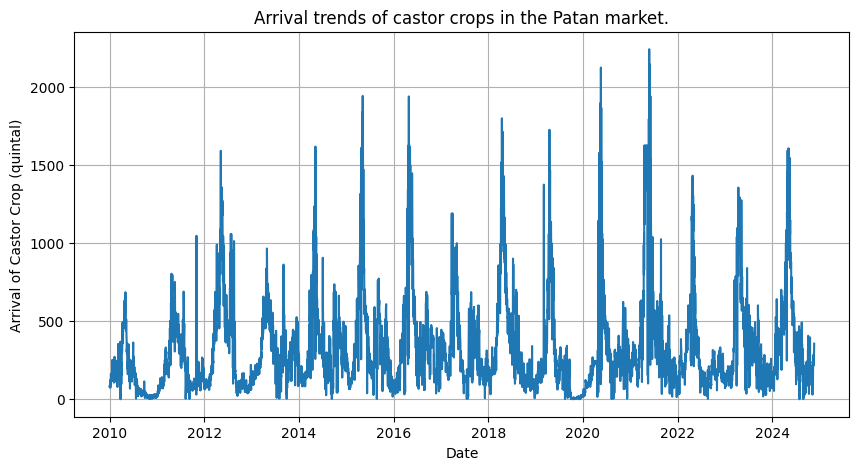

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Date'],df['Arrival'])
# plt.plot(df['Arrival'])
plt.title('Arrival trends of castor crops in the Patan market.')
plt.xlabel('Date')
plt.ylabel('Arrival of Castor Crop (quintal)')
plt.grid(True)
plt.show();

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])
test_result

(-1.7279350826860123,
 0.41677998192014937,
 28,
 5409,
 {'1%': -3.431559540776716,
  '5%': -2.862074495126272,
  '10%': -2.5670545108744043},
 63159.62039410306)

In [ ]:
 ### Testing For Stationarity
 from statsmodels.tsa.stattools import adfuller
 test_result1=adfuller(df['Price'].diff().dropna())
 test_result1

(-11.781348606851434,
 1.0330943009576943e-21,
 33,
 5403,
 {'1%': -3.431560884603653,
  '5%': -2.8620750888414417,
  '10%': -2.5670548269288087},
 63148.50808057397)

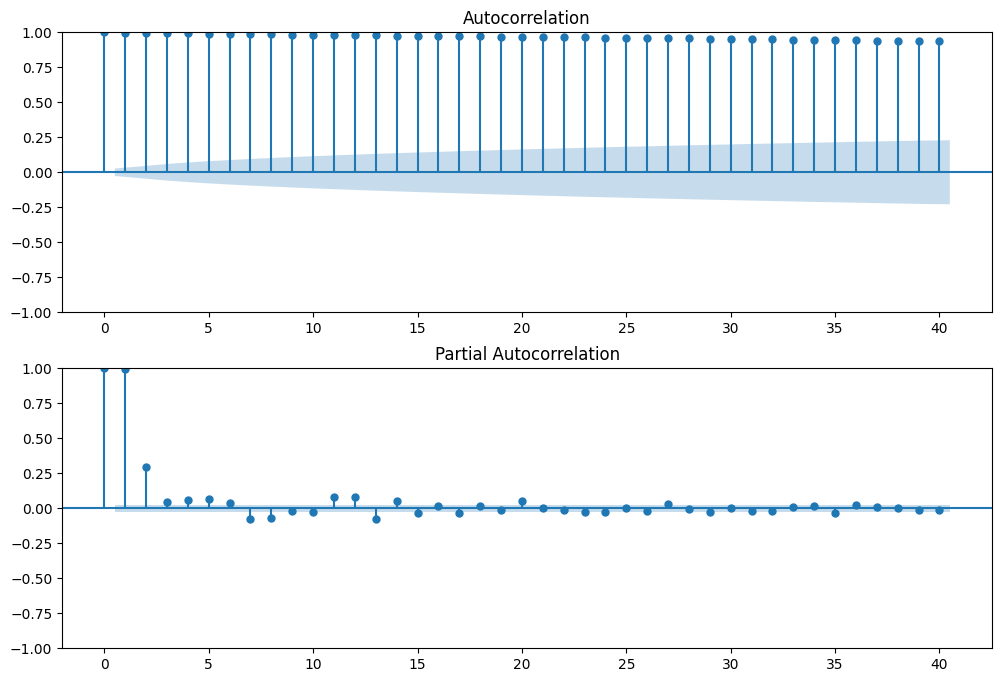

In [ ]:
 import matplotlib.pyplot as plt
 fig = plt.figure(figsize=(12,8))
 ax1 = fig.add_subplot(211)
 fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
 ax2 = fig.add_subplot(212)
 fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
 plt.show()

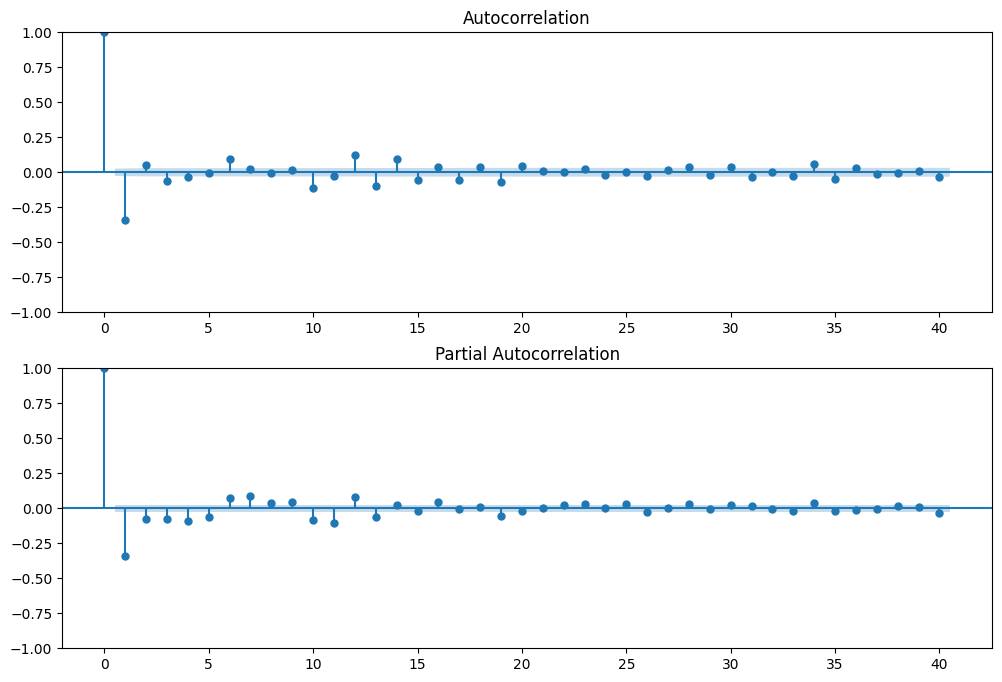

In [ ]:
 fig = plt.figure(figsize=(12,8))
 ax1 = fig.add_subplot(211)
 #Plots with first order differenced Sales variable
 fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
 ax2 = fig.add_subplot(212)
 fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
 plt.show()

In [ ]:
X = df['Price']
X = X.values
# Modify the split: use the last 1000 rows for testing, the rest for training
# train, test = X[0:len(X)-1000], X[len(X)-1000:]
train, test = df['Price'][0:len(df)-1000], df['Price'][len(df)-1000:]


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0,
                          max_p=3, max_d=3, max_q=3, start_P=0,
                          D=1, start_Q=0, max_P=3, max_D=3,
                          max_Q=3, m=7, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=56095.554, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=54052.389, Time=1.79 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=11.61 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=55301.762, Time=0.29 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=53623.938, Time=8.92 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=53330.321, Time=7.30 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=22.32 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=10.26 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=53916.377, Time=3.31 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=53294.425, Time=8.31 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=53586.645, Time=4.41 sec
 ARIMA(2,1,0)(3,1,1)[7]             : AIC=inf, Time=27.31 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=13.45 sec
 ARIMA(3,1,0)(3,1,0)[7]             : AIC=53273.270, Time=10.25 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=5

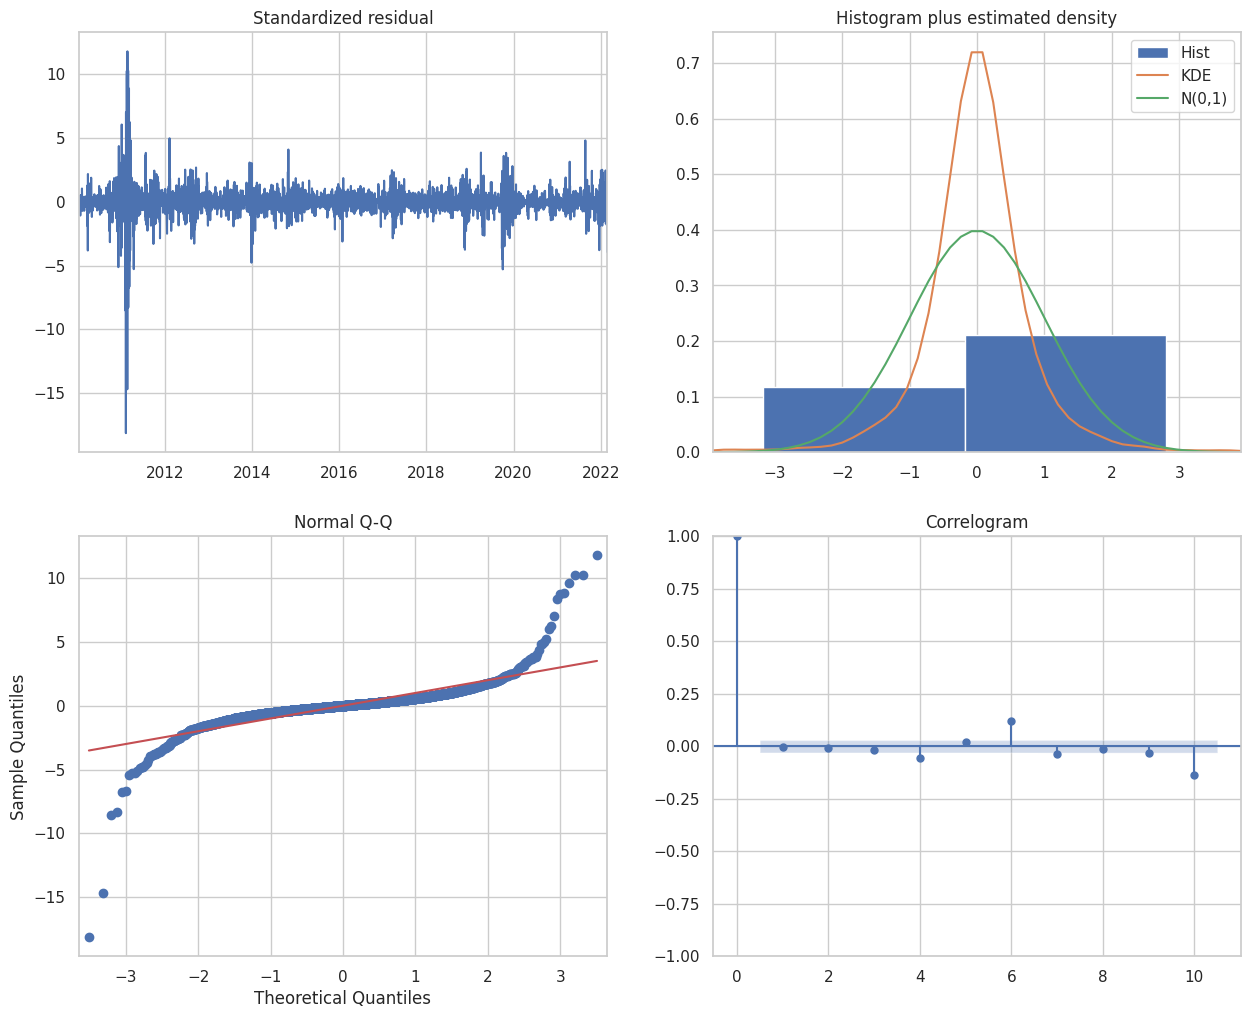

In [ ]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
def forecast(ARIMA_model, periods=60):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    #pred = ARIMA_model.predict(n_periods=len(df["#y"]),dynamic=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["Price"], color='#1f76b4')
    #plt.plot(pred, color='yellow')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)
    plt.title("ARIMA/SARIMA - Forecast")
    plt.show()

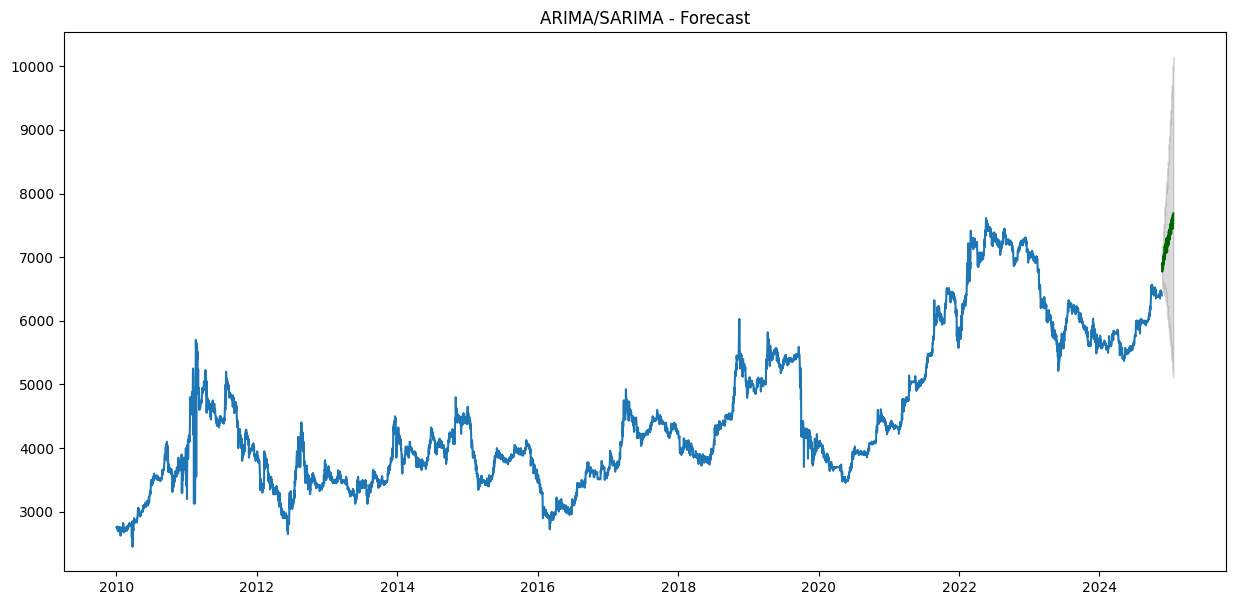

In [ ]:
forecast(arima_model)

In [ ]:
#nonsesonal
#Standard ARIMA Model
ARIMA_model = auto_arima(df['Price'],  # Changed from df['#y'] to df['price']
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True, n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63844.491, Time=5.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=64568.997, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63902.219, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63842.531, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=64567.288, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=63844.503, Time=2.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63844.234, Time=4.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=63841.402, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=63843.407, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63843.394, Time=1.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=63900.815, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=63843.173, Time=2.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 19.645 seconds


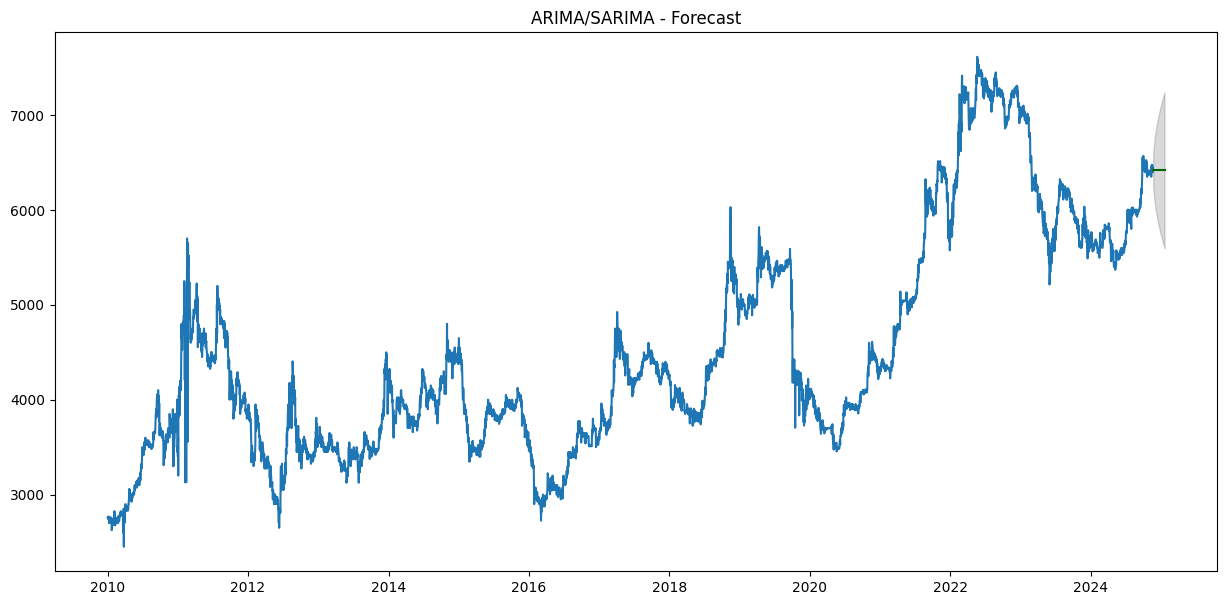

In [ ]:
forecast(ARIMA_model)